# QuTiP Tutorial - Simulating a Single Qubit

In [6]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
import scipy.constants as const

We are going to simulate a single qubit undergoing a time evolution described by the Hamiltonian:

$H = \frac{\sigma_z}{2} \Delta+\Omega\left(\sigma_+ + \sigma_-\right)$

where the state of a qubit at time $t$ is described by $|\psi(t)\rangle = e^{-iHt/\hbar}|\psi(0)\rangle$.

To find the time evolution at each moment in time, we use **QuTiP's `mesolve()`** function, which takes in the Hamiltonian, original state, and time space as input. In order to access the states, call for `result.states`.

In [7]:
def run_time_evolution(delta, omega, psi0, end_time, sample_size):
    H_driving = 2*np.pi*omega*(qt.sigmap() + qt.sigmam())
    H_system = (1/2.0) * qt.sigmaz() * delta

    H = H_system + H_driving
    display(H)
    
    ts = np.linspace(0, end_time, sample_size)
    result = qt.mesolve(H, psi0, ts)
    
    return result

In the following, we designate the parameters $\Delta$, $|\psi(0)\rangle$, and $\Omega$.

In [8]:
delta = 0
omega = 1e6
psi0 = qt.basis(2, 0)

display(qt.sigmaz())
display(psi0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [9]:
result = run_time_evolution(delta, omega, psi0, 1e-6, 100)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[      0.         6283185.30717959]
 [6283185.30717959       0.        ]]

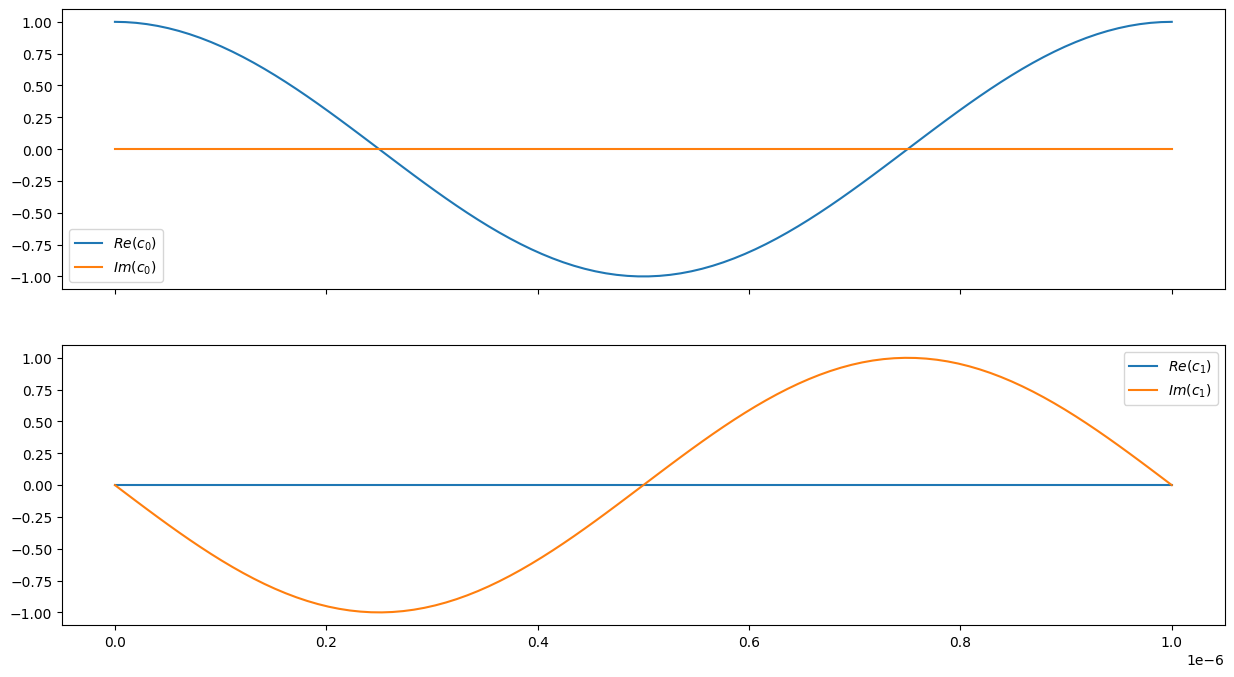

In [11]:
states = np.array(result.states).squeeze() # Turns the states into a 101 x 4 array

fig, axes = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
ts = np.linspace(0, 1e-6, 100)

for i, coeffs in enumerate(states.T):   # Plots the real and imaginary components of the two eigenstates (|0> and |1>)
    axes[i].plot(ts, coeffs.real, label=f'$Re(c_{i})$')
    axes[i].plot(ts, coeffs.imag, label=f'$Im(c_{i})$')
    axes[i].legend()
    

Instead of using QuTiP's Bloch sphere, we use imported code to plot our qubit's evolution, which can be viewed by clicking to expand the code below:

In [12]:
# Written by Akel Hashim.
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        """Class for drawing a 3D arrow.
        :param xs:
        :type xs:
        :param ys:
        :type ys:
        :param zs:
        :type zs:
        :param args:
        :type args:
        :param kwargs:
        :type kwargs:
        """
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)


class BlochSphere:

    def __init__(self,
                 figsize=(10, 10),
                 label_fontsize=35,
                 tick_label_fontsize=20,
                 point_size=60,
                 point_alpha=1.0,
                 show_background_grid=True,
                 show_background=True,
                 rotation_angle=45):
        """
        Class for plotting points and vectors on the Bloch Sphere.
        :param figsize: figure size for Bloch Sphere (default: (10,10))
        :type figsize: tuple
        :param label_fontsize: fontsize for x-, y-, z-labels (default: 35)
        :type label_fontsize: int
        :param tick_label_fontsize:  fontsize for x-, y-, z-ticks (default: 20)
        :type tick_label_fontsize: int
        :param point_size: point size for scatter plots
        :type point_size: int
        :param point_alpha: opacity for points in scatter plots
        :type point_alpha: float
        :param show_background_grid: display x, y, z grids behind Bloch sphere
        :type show_background_grid: bool
        :param show_background: display background behind Bloch sphere
        :type show_background: bool
        :param rotation_angle: angle about the z-axis to rotate the Bloch sphere for viewing
        :type rotation_angle: int
        """

        self.figsize = figsize
        self.label_fontsize = label_fontsize
        self.tick_label_fontsize = tick_label_fontsize
        self.point_size = point_size
        self.point_alpha = point_alpha
        self.show_background_grid = show_background_grid
        self.show_background = show_background
        self.rotation_angle = rotation_angle

        self.fig = None

    def draw_bloch_sphere(self):
        """Draws an empty Bloch sphere."""
        phi = np.linspace(0, 2 * np.pi, 50)
        theta = np.linspace(0, np.pi, 50)
        PHI, THETA = np.meshgrid(phi, theta)

        x_sphere = np.sin(PHI) * np.cos(THETA)
        y_sphere = np.sin(PHI) * np.sin(THETA)
        z_sphere = np.cos(PHI)

        self.fig = plt.figure(figsize=self.figsize)
        self.ax = plt.axes(projection='3d')
        self.ax.plot_wireframe(x_sphere, y_sphere, z_sphere, rstride=1, cstride=1, color='k', alpha=0.1, linewidth=1)
        self.ax.plot([-1, 1], [0, 0], [0, 0], c='k', alpha=0.5)
        self.ax.plot([0, 0], [-1, 1], [0, 0], c='k', alpha=0.5)
        self.ax.plot([0, 0], [0, 0], [-1, 1], c='k', alpha=0.5)
        self.ax.plot(np.cos(phi), np.sin(phi), 0, c='k', alpha=0.5)
        self.ax.plot(np.zeros(50), np.sin(phi), np.cos(phi), c='k', alpha=0.5)
        self.ax.plot(np.sin(phi), np.zeros(50), np.cos(phi), c='k', alpha=0.5)
        self.ax.set_xlabel(r'$\langle x \rangle$', fontsize=self.label_fontsize)
        self.ax.set_ylabel(r'$\langle y \rangle$', fontsize=self.label_fontsize)
        self.ax.set_zlabel(r'$\langle z \rangle$', fontsize=self.label_fontsize)
        self.ax.set_xlim(-1, 1)
        self.ax.set_ylim(-1, 1)
        self.ax.set_zlim(-1, 1)
        self.ax.set_xticklabels(['-1', '', '', '', '', '', '', '', '1'], fontsize=self.tick_label_fontsize)
        self.ax.set_yticklabels(['-1', '', '', '', '', '', '', '', '1'], fontsize=self.tick_label_fontsize)
        self.ax.set_zticklabels(['-1', '', '', '', '', '', '', '', '1'], fontsize=self.tick_label_fontsize)
        self.ax.set_facecolor('white')
        self.ax.grid(self.show_background_grid, color='k')
        if self.show_background is False:
            self.ax.set_axis_off()
        if self.rotation_angle is not None:
            self.ax.view_init(30, self.rotation_angle)

    def add_points(self, points, color=None):
        """Adds points to the Bloch sphere.
        :param points: [x, y, z] coordinates for a point
            Each can be an individual list of multiple coordinates for multiple points.
        :type points: list|np.array
        :param color: color of points for scatter point (default: None)
        :type color: None|str|RGB
        """
        """Add points to the Bloch Sphere."""
        if self.fig is None:
            self.draw_bloch_sphere()

        x, y, z = points
        if color is None:
            self.ax.scatter3D(x, y, z, s=self.point_size, alpha=self.point_alpha)
        else:
            self.ax.scatter3D(x, y, z, s=self.point_size, alpha=self.point_alpha, color=color)

    def add_vector(self, vector, color=None):
        """Add a vector to the Bloch sphere.
        :param vector: [x, y, z] coordinates for the tip of a vector
        :type vector: list|np.array
        :param color: color of vector (default: None)
        :type color: None|str|RGB
        :return:
        :rtype:
        """
        """Add points to the Bloch Sphere."""
        if self.fig is None:
            self.draw_bloch_sphere()

        x, y, z = vector
        if color is None:
            p = self.ax.plot([0, x], [0, y], [0, z], linewidth=3)
            a = Arrow3D([0, x], [0, y], [0, z], mutation_scale=35, arrowstyle='-|>', color=p[0].get_color())
        else:
            self.ax.plot([0, x], [0, y], [0, z], linewidth=3, color=color)
            a = Arrow3D([0, x], [0, y], [0, z], mutation_scale=35, arrowstyle='-|>', color=color)
        self.ax.add_artist(a)

    def show(self, save=False, directory=None, filename=None):
        """Plot the Bloch Sphere in a figure.
        :param save: save the figure (default: False
        :type save: bool
        :param directory: directory in which the save the figure (default: None)
            If None, it will save in the current directory.
        :type directory: None|str
        :param filename: string to prepend in front for 'Bloch_sphere.png' for a filename
        :type filename: None|str
        """
        if self.fig is None:
            self.draw_bloch_sphere()
        plt.tight_layout()
        if save is True:
            plt.savefig(f'{directory}{filename}Bloch_sphere.png', dpi=300)
        plt.show()

In order to visualize the transformation of the qubit state, we transform the states into (x, y, z) coordinates using the standard x, y, and z matrices.

In [13]:
def transform_to_xyz(mesolve_result):
    
    points = []
    for state in mesolve_result.states:
        x = state.dag()*qt.sigmax()*state
        y = state.dag()*qt.sigmay()*state
        z = state.dag()*qt.sigmaz()*state

        #print("Coordinates: ", x, y, z)
        points.append((x, y, z))
        
    points = np.array(points).real.squeeze()
    return points

points = transform_to_xyz(result)

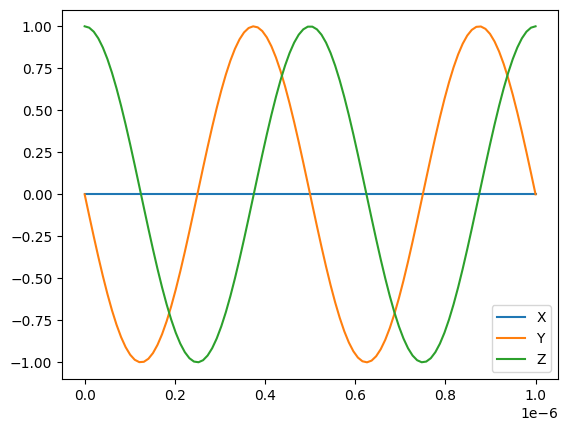

In [14]:
fig, ax = plt.subplots()
ax.plot(ts, points[:,0], label='X')
ax.plot(ts, points[:,1], label='Y')
ax.plot(ts, points[:,2], label='Z')
ax.legend()

Through the imported code, we create a `BlochSphere` object and plot the points. We observe 50 points corresponds to one full rotation around the $x$ axis, which makes sense because we used the $\sigma_x$ matrix to describe the Hamiltonian and we evolved our state over one full period.

C:\Users\Jchen\AppData\Local\Temp\ipykernel_37092\322077829.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_xticklabels(['-1', '', '', '', '', '', '', '', '1'], fontsize=self.tick_label_fontsize)
C:\Users\Jchen\AppData\Local\Temp\ipykernel_37092\322077829.py:100: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_yticklabels(['-1', '', '', '', '', '', '', '', '1'], fontsize=self.tick_label_fontsize)
C:\Users\Jchen\AppData\Local\Temp\ipykernel_37092\322077829.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_zticklabels(['-1', '', '', '', '', '', '', '', '1'], fontsize=self.tick_label_fontsize)


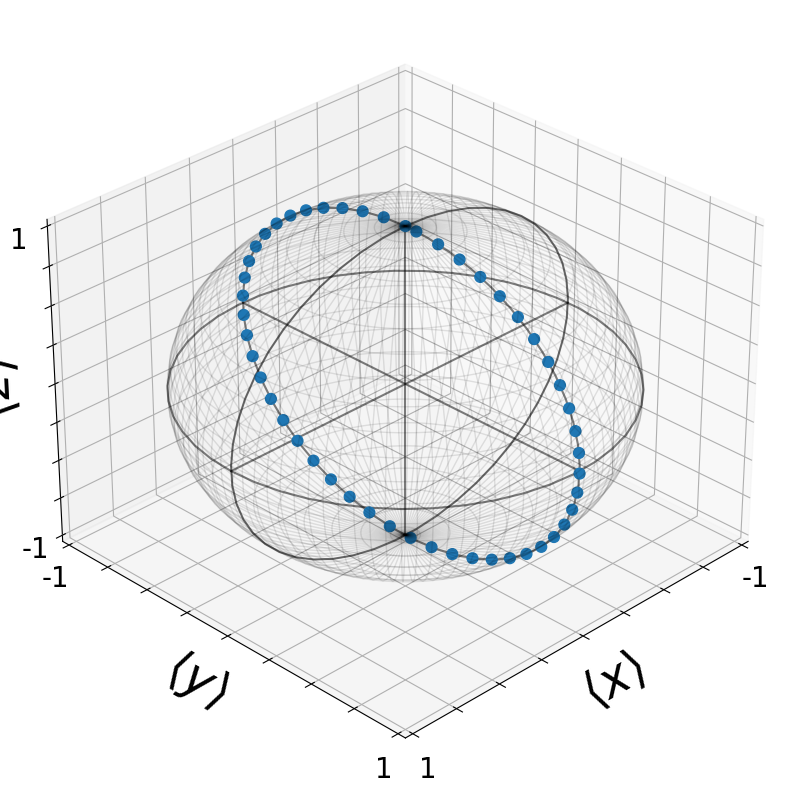

In [15]:
bloch = BlochSphere()
bloch.add_points(points[:50].T)

### $\Delta$ Effects on Time Evolution

Because $\Delta=0$, the Hamiltonian causes the qubit state to arrive back at its original location. But now let's observe what happens when $\Delta \neq 0$ and how this affects the state evolution of the qubit. 

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-5000000.          6283185.30717959]
 [ 6283185.30717959  5000000.        ]]

C:\Users\Jchen\AppData\Local\Temp\ipykernel_37092\322077829.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_xticklabels(['-1', '', '', '', '', '', '', '', '1'], fontsize=self.tick_label_fontsize)
C:\Users\Jchen\AppData\Local\Temp\ipykernel_37092\322077829.py:100: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_yticklabels(['-1', '', '', '', '', '', '', '', '1'], fontsize=self.tick_label_fontsize)
C:\Users\Jchen\AppData\Local\Temp\ipykernel_37092\322077829.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_zticklabels(['-1', '', '', '', '', '', '', '', '1'], fontsize=self.tick_label_fontsize)


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 500000.         6283185.30717959]
 [6283185.30717959 -500000.        ]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 5000000.          6283185.30717959]
 [ 6283185.30717959 -5000000.        ]]

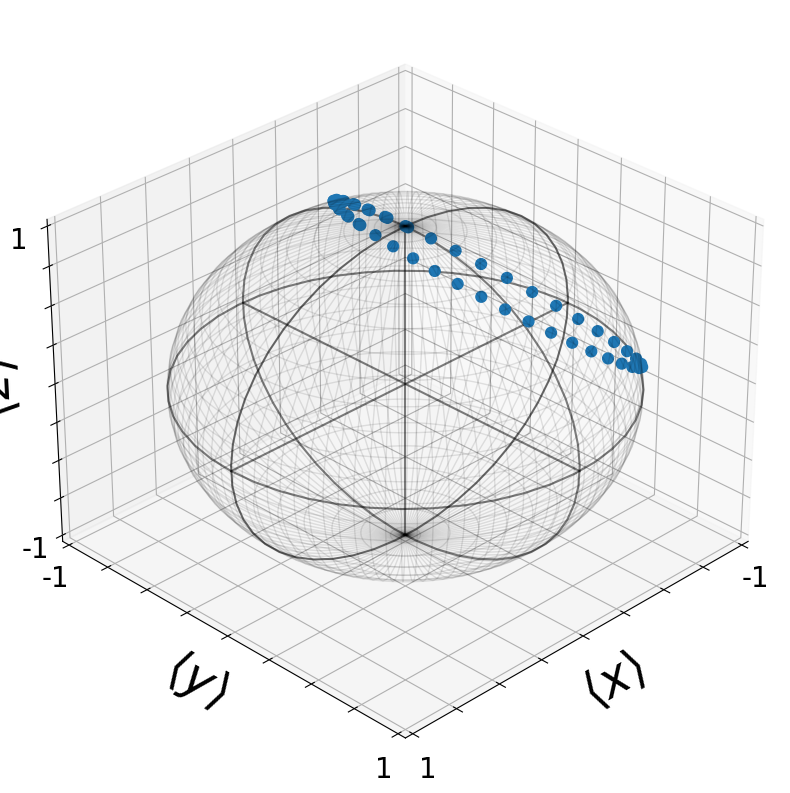

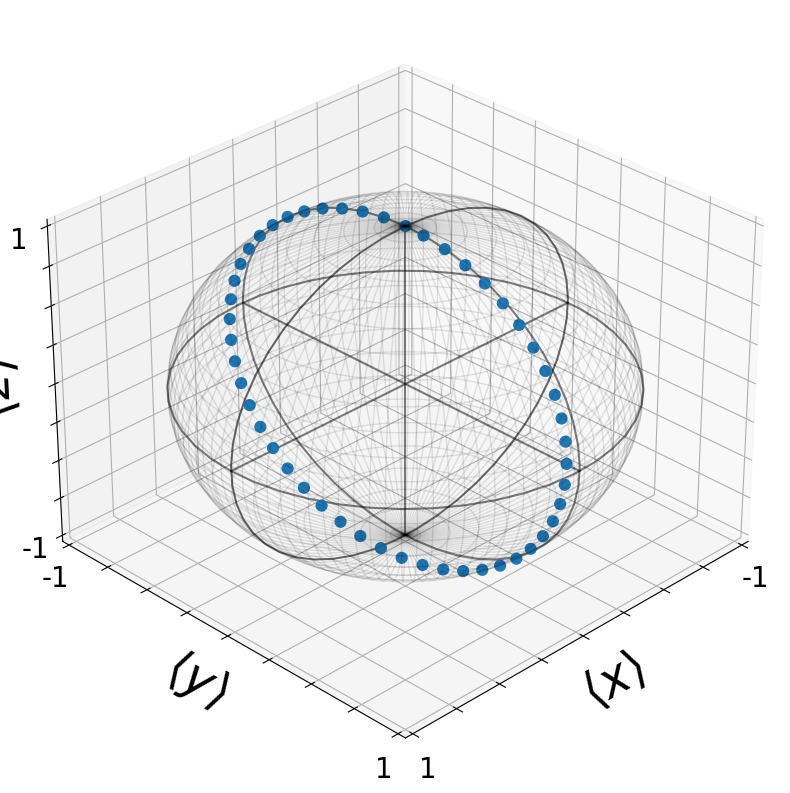

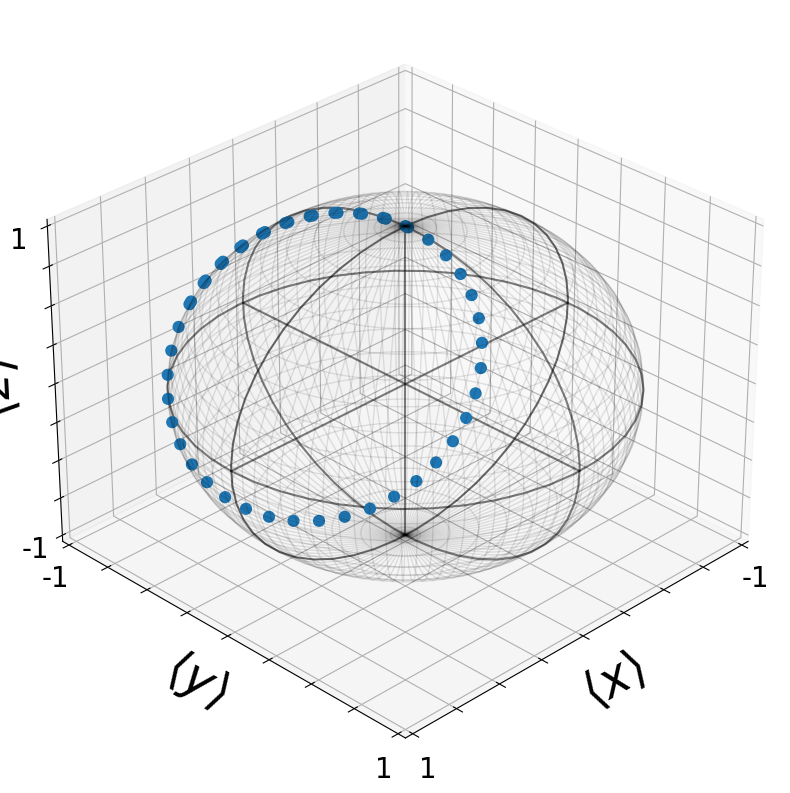

In [16]:
delta_list = [-1e7, 1e6, 1e7]

omega = 1e6
psi0 = qt.basis(2, 0)

for delta in delta_list:
    mesolve_result = run_time_evolution(delta, omega, psi0, 2e-6, 201)
    xyz_points = transform_to_xyz(mesolve_result)
    
    bloch = BlochSphere()
    bloch.add_points(xyz_points[:50].T)
    

When $\Delta$ is less than or equal to the order of magnitude of the amplitude of $\Omega$, the drift from its original location is little to none. But as soon as this threshold is passed, significant deviation is observed, which can be seen in the third plot where $\Delta = 10^7$ and $\Omega = 10^6$. Furthermore changing the sign of $\Delta$ changes the direction of the drift, where positive corresponds to positive $y$ and vice versa. 

### Complex $\Omega$ Effects on Time Evolution

Now let's observe what hapens when the amplitude or $\Omega$ is complex. 

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 5000000.            +0.j         6283185.30717959+62831.8530718j]
 [ 6283185.30717959+62831.8530718j -5000000.            +0.j       ]]

C:\Users\Jchen\AppData\Local\Temp\ipykernel_37092\322077829.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_xticklabels(['-1', '', '', '', '', '', '', '', '1'], fontsize=self.tick_label_fontsize)
C:\Users\Jchen\AppData\Local\Temp\ipykernel_37092\322077829.py:100: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_yticklabels(['-1', '', '', '', '', '', '', '', '1'], fontsize=self.tick_label_fontsize)
C:\Users\Jchen\AppData\Local\Temp\ipykernel_37092\322077829.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_zticklabels(['-1', '', '', '', '', '', '', '', '1'], fontsize=self.tick_label_fontsize)


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 5000000.             +0.j          6283185.30717959+628318.53071796j]
 [ 6283185.30717959+628318.53071796j -5000000.             +0.j        ]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 5000000.              +0.j          6283185.30717959+6283185.30717959j]
 [ 6283185.30717959+6283185.30717959j -5000000.              +0.j        ]]

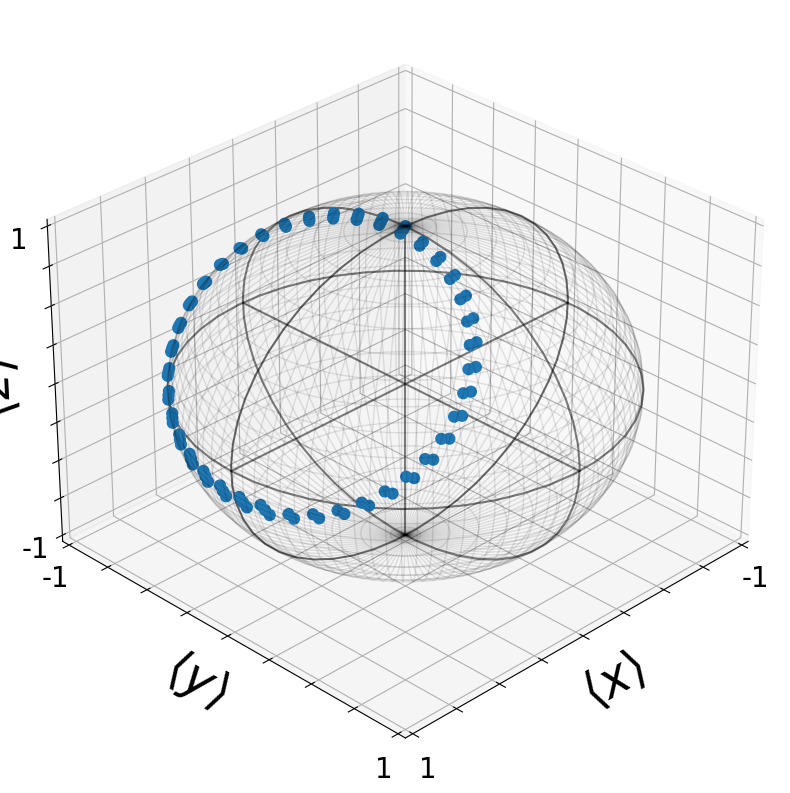

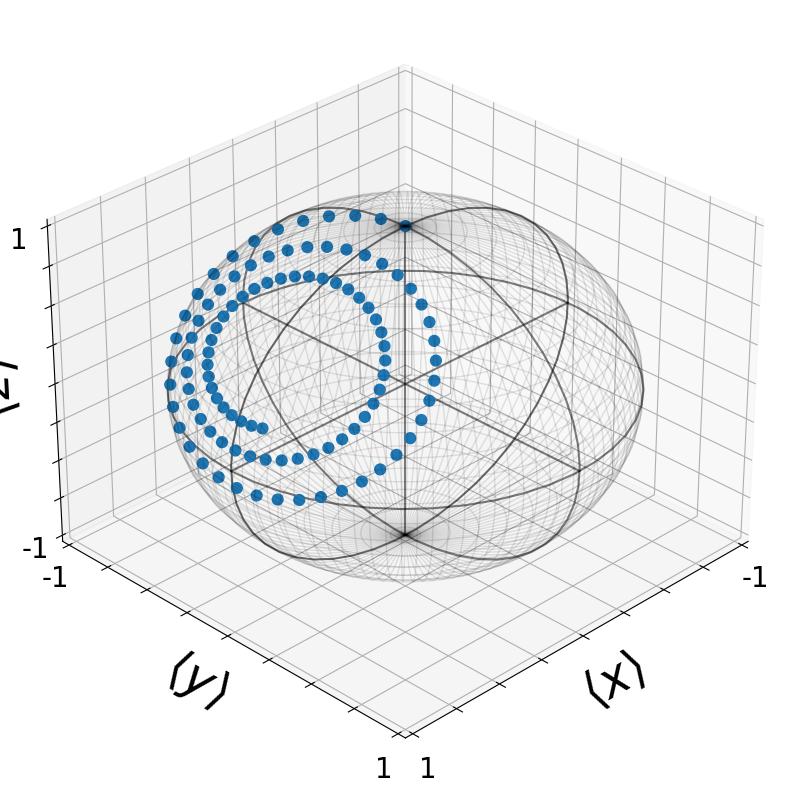

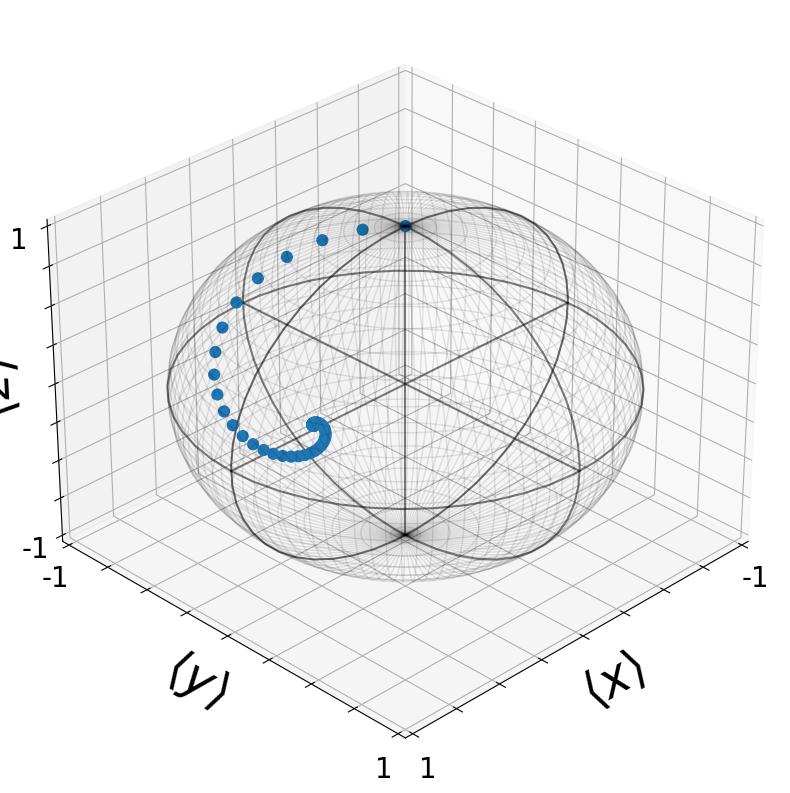

In [19]:
delta = 1e7
omega_list = [complex(1e6, 1e4), complex(1e6, 1e5), complex(1e6, 1e6)]
psi0 = qt.basis(2, 0)

for omega in omega_list:
    mesolve_result = run_time_evolution(delta, omega, psi0, 2e-6, 201)
    xyz_points = transform_to_xyz(mesolve_result)

    bloch = BlochSphere()
    bloch.add_points(xyz_points[:100].T)

Here we observe that the spiraling effect is only significant when the order of magnitude of the imaginary component of the amplitude is similar to that of the real component. The larger the frequency, the faster it spirals, and vice versa. This means for smaller imaginary components, the drift effect is small. 

To dive even further into how the Hamiltonian affects the evolution of a state, let's change up the parameters and see how we can learn more about...